# Improve query performance using Flux
- Flux is a functional data scripting language designed to unify querying, processing, analyzing, and acting on data into a single syntax.
[Documentation](https://docs.influxdata.com/flux/v0.x/get-started/)

### Setting query api

In [2]:
import influxdb_client, os, time
from datetime import datetime, timedelta, timezone
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS

token = "fP-GBq8Z1wZE7iW8qFBuxVy-ArVP9TqVec0naJ77XLECiwSr82aRXqvo3ylXZqU_2ad2vxWGcMoMbl3PXqAZ7A=="
server_url = "http://140.112.12.62:8086"
client = InfluxDBClient(url=server_url, token=token)
query_api = client.query_api()

# Query data using optimized Flux
When we draw DSD plot. There's no need to know when each drop is measured.  
Thus, we can ask the influxdb to preprocess the data for us.  
So we don't need to deal with massive string based data in python.  
This could be hundreds times efficient.

313


(0.0, 32.0)

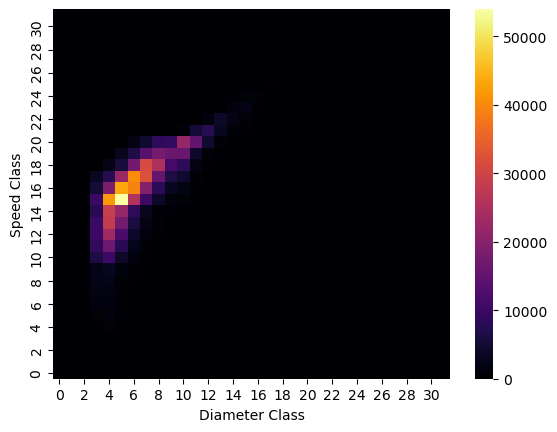

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

with open("flux/parsivel_drops.flux", "r") as fluxfile:
    query_str = fluxfile.read()
    result = query_api.query(org="NTUCE", query = query_str)

dsd = np.zeros((32, 32))
print(len(result))
for table in result:
    for record in table.records:
        dsd[int(record.values["Speed Class"])-1, int(record.values["Diameter Class"])-1] = record.get_value()
        
plt.clf()
sns.heatmap(dsd, cmap="inferno")
plt.xlabel("Diameter Class")
plt.ylabel("Speed Class")
plt.xlim(0, 32)
plt.ylim(0, 32)

Text(0, 0.5, 'Count')

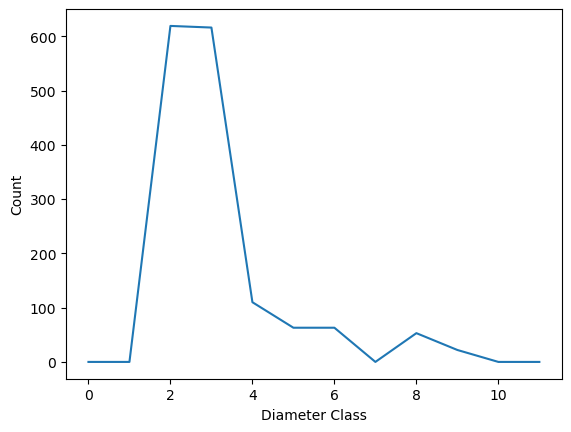

In [7]:
with open("flux/WS100_dsd.flux", "r") as fluxfile:
    query_str = fluxfile.read()
    result = query_api.query(org="NTUCE", query = query_str)

dsd = np.zeros(12)
for table in result:
    for record in table.records:
        dsd[int(record.get_field()[11:])] = record.get_value()
        
plt.plot(dsd)
plt.xlabel("Diameter Class")
plt.ylabel("Count")